# Chapter 12 - An Application: Solving a Simple Regression Problem

*(C) Copyright Notice: This chapter is part of the book available at https://pp4e-book.github.io/ and copying, distributing, modifying it requires explicit permission from the authors. See the book page for details: https://pp4e-book.github.io/*

In this chapter, we will cover an important problem in many disciplines: that of fitting (regressing) a function to a set of data, i.e. the regression problem. We will look at two versions, namely, linear regression and non-linear regression, using SciPy. While doing so, we will use Pandas, NumPy and Matplotlib as well, which were covered in Chapter 10.


## 12.1 Introduction

Let us first formulate the problem and clearly outline the notation. In a regression problem, we have a set of $x,y$ values: $\{(x_0, y_0), (x_1, y_1), ..., (x_n, y_n)\}$, where $x_i$ and $y_i$ can be multi-dimensional variables (i.e. vectors) but for the sake of simplicity, in this chapter we will work with one-dimensional $x_i$ and $y_i$ values. In a regression problem, we are interested in finding the function $f()$ that goes through those $(x_i, y_i)$ values. In other words, we wish to find $f()$ that satisfies the following:

$$
y_i = f(x_i).
$$

At first, this might look difficult since we are trying to estimate a function from its input-output values and there can be infinitely many functions that can go through a finite set of $(x_i, y_i)$ values. However, by restructuring the problem a little bit and making some assumptions on the general form of $f()$, we can solve such complicated regression problems very well. 

Let us briefly describe how we can do so: We first re-write $f()$ as a parametric function and try to formulate the regression problem as the problem of finding the parameters of $f()$:

$$
y = f(x) = f(x;\mathbf{\theta}) = \sum_{i=1}^{m} g_i(x; \theta_i),
$$

where $\mathbf{\theta}=(\theta_1, ..., \theta_n)$ is the set of parameters that we need to find to solve the regression problem; and $g_1(), ..., g_m()$ are our "simpler" functions (compared to $f()$) whose parameters can be identified more easily compared to $f()$.

With this parameterized definition of $f()$, we can formally define regression as an optimization (minimization) problem (see also Chapter 11):

$$
\theta^* \leftarrow  \arg\min_{\theta\in\mathbb{R}^d} \sum_i \left(y_i - f(x_i; \theta)\right)^2,
$$

where the summation runs over the $(x_0, y_0), (x_1, y_1), ..., (x_n, y_n)$ values that we are trying to regress; $\left(y_i - f(x_i; \theta)\right)^2$ is the error between the estimated (regressed) value (i.e. $f(x_i; \theta)$) and the correct $y_i$ value with $\theta$ as the parameters. 

We can describe this optimization formulation in words as: Find parameters $\theta$ that minimize the error between $y_i$ and what the function is predicting given $x_i$ as input. 

This is a minimization problem and in Chapter 11, we have seen a simple solution and how SciPy can be used for such problems. In this chapter, we will spend more time on this with sample regression problems and solutions. Namely, 

- Linear regression, where $f()$ is assumed to be a line, $y=ax+b$, and $\theta$ is $(a,b)$.

- Non-linear regression, where $f()$ has a non-linear nature, e.g. a quadratic, exponential or logarithmic form.





### 12.1.1 Why is regression important?

In many disciplines, we observe an environment, an event, or an entity through sensors or some data collected in a different manner, and obtain some information about what we are observing in the form of a variable $x$. Each $x$ generally has an associated outcome variable $y$. Or $x$ can represent an action that we are exerting in an environment and we are interested in finding how $x$ affects the environment by observing a variable $y$. 

Here are some examples for $x$ and $y$ for which finding a function $f()$ can be really useful:

- $x$: The current that we are providing to a motor. $y$: The speed of the motor.

- $x$: The day of a year. $y$: The average rain fall on a year.

- $x$: The changes in stock value of a bond in the last day. $y$: The value of a bond in one hour.

- $x$: The number of COVID cases in a day. $y$: The number of deaths owing to COVID.
 

### 12.1.2 The form of the function

As discussed before, solving the regression problem without making any assumption about the underlying function is very challenging. We can simplify the problem by making an assumption about the function. However, an incorrect assumption can yield inaccurate regression model. 

This is illustrated very well in a famous cartoon in <font color=gray>Figure 12.1</font>. As illustrated, if the form of the function is too simple (e.g. linear), the fitted function will not be able to capture the true nature of the data. However, if the assumed function form is too complex (e.g. a higher-order polynomial), the fitted function will try to go through every data point, which may not be ideal since the data can be noisy. 

Choosing the right form of the function is therefore tricky and it requires some prior idea about the function or the problem. If the relationship between $x$ and $y$ is known to be linear, then a linear function form should be chosen. If the relation between $x$ and $y$ is known to be non-linear but the exact form is unknown, $x$ and $y$ can be plotted first to get a feeling for the underlying form. This can give an idea for what kinds of function forms can be suitable.

<center>
<img src="https://imgs.xkcd.com/comics/curve_fitting.png">

*Figure 12.1. The challenging regression problem can be simplified by making an assumption about the underlying function; as illustrated in the drawings, the function can be assumed to be linear, quadratic, logarithmic etc. However, an incorrect assumption can yield inaccurate regression. (Figure source: https://xkcd.com/2048/)*
</center>

## 12.2 Least-Squares Regression

A commonly-used method for regression is called Least-Squares Regression (LSE). In LSE, the minimization problem in Section 12.1 is solved by setting the gradient of the objective to zero:
$$
\frac{\partial}{\partial \theta_j} \sum_i \left(y_i - f(x_i; \theta)\right)^2 = 0, \quad \textrm{for each } j.
$$

**Linear Least-Squares Regression**. If our function is linear, i.e. $f(x_i; \theta) = \theta_1 x_i + \theta_2$, setting the gradient to zero provides us one set of equations for each $\theta_j$. If the number of data points ($x_i, y_i$) is bigger than the number of variables, these equations can be easily solved to obtain $\mathbf{\theta}$ that minimizes the objective in Section 12.1. Those interested in the derivation of the solution and its exact form can look up e.g. [Wikipedia](https://en.wikipedia.org/wiki/Linear_least_squares).

**Non-linear Least-Squares Regression**. If our function is not linear, a solution can be obtained iteratively by making a linear approximation/step at each iteration using the so-called [Gauss-Newton method](https://en.wikipedia.org/wiki/Gauss%E2%80%93Newton_algorithm).

## 12.3 Linear Regression with SciPy

SciPy has a function called ``scipy.stats.linregress(x, y)`` which we can use to regress a line passing through a set of points. Let us go through an example to see how we can do that. Moreover, we will use our regressed line to analyze some properties of our data.

### 12.3.1 Create Artificial Data

To keep things simple, let us generate some artificial data in Python and save it in a file called `ch12_linear_data_example.csv`. We have already run this code and saved this CSV file on web -- in the following steps, we will continue with this file on the web. However, you can change the following code the generate data in different forms and with different noise levels and observe how the different regression methods perform.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_func(f, params, xs, legend):
  ys = f(xs, *params) # This is called parameter unpacking -- Google and learn this
  plt.plot(xs, ys, label=legend)

def line_func(x, a, b):
  """Line function."""
  #(a,b) = params
  return a*x + b

xs = np.linspace(-10, 10, 100)
ys = line_func(xs, 3, 0.5) + np.random.normal(0, 4, xs.size) # add random noise

df = pd.DataFrame({'x': xs, 'y': ys})
df.to_csv("ch12_linear_data_example.csv")

print("Created {0} many data points and saved them into CSV file.".format(xs.size))

Created 100 many data points and saved them into CSV file.


### 12.3.2 Download and Visualize Data

Let us download the `ch12_linear_data.csv` file from web so that we can provide you the experience of a full data analysis pipeline.

In [13]:
# Let us download our data 
!wget -nc https://raw.githubusercontent.com/sinankalkan/CENG240/master/figures/ch12_linear_data.csv

# Import the necessary libraries
import pandas as pd

# Read the file named 'ch12_linear_data.csv'
df = pd.read_csv('ch12_linear_data.csv')

# Print the CSV file's contents:
print("The CSV file contains the following:\n", df, "\n")

# Check the types of each column
df.dtypes

--2021-06-21 17:13:27--  https://raw.githubusercontent.com/sinankalkan/CENG240/master/figures/ch12_linear_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4049 (4.0K) [text/plain]
Saving to: ‘ch12_linear_data.csv’

ch12_linear_data.cs 100%[===================>]   3.95K  --.-KB/s    in 0s      

2021-06-21 17:13:28 (49.7 MB/s) - ‘ch12_linear_data.csv’ saved [4049/4049]

The CSV file contains the following:
     Unnamed: 0          x          y
0            0 -10.000000 -29.198799
1            1  -9.797980 -33.379918
2            2  -9.595960 -25.661456
3            3  -9.393939 -24.037193
4            4  -9.191919 -25.264474
..         ...        ...        ...
95          95   9.191919  27.905021
96          96   9.393939  24.494575
97          97   

Unnamed: 0      int64
x             float64
y             float64
dtype: object

Text(0.5, 1.0, 'y vs x')

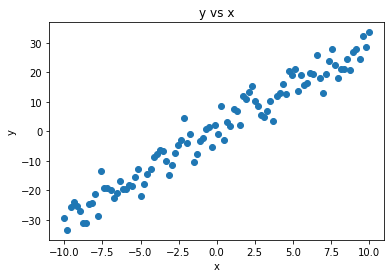

In [14]:
# Let us visualize the data
import matplotlib.pyplot as plt

xs = df['x'][:].values
ys = df['y'][:].values

# Plot y vs. x
plt.scatter(xs, ys) 

# Set the labels for x and y axes:
plt.xlabel('x') 
plt.ylabel('y')

# Set the title of the figure
plt.title("y vs x")


We see that our data is rather noisy, though it more or less follows a linear function. Let us see whether we can capture that.

### 12.3.3 Fit a Linear Function with SciPy

Now, let us fit a line (linear function) to our data using ``scipy.stats.linregress``. The specific method being used by this function is Least-Squares Regression which we briefly explained in Section 12.2.

In [15]:
# Import stats module
from scipy import stats

# Fit a linear model:
solution = stats.linregress(xs, ys)

# Get the slope (a) and the intercept (b) in y = ax + b
a_estimated = solution.slope
b_estimated = solution.intercept

print("The estimated solution is: y = %4f x + %4f" % (a_estimated, b_estimated))

The estimated solution is: y = 2.963812 x + 0.442237


### 12.3.4 Analyze the Solution

We have obtained a solution. Now, let us analyze how good the solution is. We can do that qualitatively (by visual inspection) or quantitatively (by looking at some numerical measures of how good the fit is).

**1- Qualitative Analysis**. For regression, a qualitative analysis can be performed by plotting the data, the obtained solution and the correct solution. If the obtained solution goes through the data well and is close to the original solution in the graph, then we can visually confirm whether the solution looks acceptable.

Let us do this for our example:

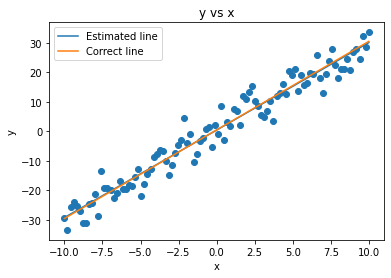

In [16]:
# Plot y vs. x
plt.scatter(xs, ys)

# Plot the estimated line
plot_func(line_func, (a_estimated, b_estimated), xs, "Estimated line")

# Plot the correct line 
# The data was generated from y = 3x + 0.5
a_correct = 3
b_correct = 0.5
plot_func(line_func, (a_correct, b_correct), xs, "Correct line")

# Set the labels for x and y axes:
plt.xlabel('x') 
plt.ylabel('y')

# Set the title of the figure
plt.title("y vs x")

# Legend
plt.legend()

We can confirm that the obtained solution (blue line) goes through the original data points well and it is almost identical to the correct line, i.e. the line from which we generated the original $(x,y)$ pairs. So, our regression solution appears to be accurate visually.

**2- Quantitative Analysis**. Qualitative analysis can be difficult sometimes and its judgment is subjective; i.e. different observers might draw different conclusions especially in cases where the solution is different from the correct solution. Therefore, in addition to the qualitative analysis like we did above, it is very common to measure the goodness of our solution with a number. 

Depending on the problem, different measures can be used. For regression, we frequently use the following three:

1. *Mean Squared Error (MSE)*. For $N$ data points, assuming $\hat{y}_i$ is the predicted value for $x_i$, MSE can be defined as follows:

  $$
    MSE = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2,
  $$
  
  which essentially accumulates the squared errors for each data point.
  
2. *Root Mean Squared Error (RMSE)*. RMSE is simply the square-root of MSE:

  $$
    RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2}.
  $$

3. *$R^2$ Error* (also called the coefficient of determination). $R^2$ is a normalized measure which considers the error of the "correct" solution as well. Since data can be noisy, this can be a better way to understand how good/bad our error value (MSE or RMSE) was. $R^2$ Error is defined as:

  $$
    R^2 = 1 - \frac{\textrm{MSE of estimates}}{\textrm{MSE wrt. the mean of y}}
    = 1 - \frac{1/N \sum_{i=1}^N (y_i - \hat{y}_i)^2}{1/N \sum_{i=1}^N (y_i - \overline{y}_i)^2} = 1 - \frac{\sum_{i=1}^N (y_i - \hat{y}_i)^2}{\sum_{i=1}^N (y_i - \overline{y})^2},
  $$

  where $\overline{y}=1/N\sum_i y_i$ is the mean of $y$ values. If $R^2=1$, that means MSE of the estimates is zero; i.e. we have obtained perfect regression. If $R^2=0$, all $y_i=\overline{y}$; in other words, all estimates are the mean of the $y$ values, therefore the regression method did not find a good solution. If, on the other hand, $R^2<0$, that means the obtained solution is even worse than the mean $y_i$ values.

  Now let us analyze our solution using these three metrics.


In [17]:
def MSE(estimated_y, correct_y):
  """
    Mean Squared Error between the estimated_y and correct_y values.
    Inputs are both numpy arrays.
  """
  result = 0
  N = estimated_y.size
  for i in range(N):
    result += (estimated_y[i] - correct_y[i]) ** 2
  return result / N

def RMSE(estimated_y, correct_y):
  """
    Root Mean Squared Error between the estimated_y and correct_y values.
    Inputs are both numpy arrays.
  """
  return MSE(estimated_y, correct_y) ** 0.5

def R_squared(estimated_y, correct_y):
  """
    R^2 error between the estimated_y and correct_y values.
    Inputs are both numpy arrays.
  """
  MSE_of_estimates = MSE(estimated_y, correct_y)
  mean_y = correct_y.mean()
  mean_y_array = np.full(correct_y.size, mean_y)
  MSE_wrt_mean_of_y = MSE(estimated_y, mean_y_array) # an array filled with mean-y
  result = 1 - MSE_of_estimates / MSE_wrt_mean_of_y

  return result

estimated_y = xs * a_estimated + b_estimated
correct_y = ys

print("MSE Error: ", MSE(estimated_y, correct_y))
print("RMSE Error: ", RMSE(estimated_y, correct_y))
print("R-squared Error: ", R_squared(estimated_y, correct_y))

MSE Error:  14.710406962785715
RMSE Error:  3.835414835814467
R-squared Error:  0.950755415581623


We see that we have obtained very low errors. Especially the $R^2$ value is very close to one, which suggests good approximation of the regressed line to the underlying solution. Note that since our data was noisy, it was not possible to obtain $R^2 = 1$.

## 12.4 Non-linear Regression with SciPy

Let us now see how we can perform non-linear regression.

### 12.4.1 Create Artificial Data

To keep things simple, let us generate some artificial data in Python and save it in a file called `ch12_nonlinear_data_example.csv`. We have already run this code and saved this CSV file on web -- in the following steps, we will continue with this file on the web. However, you can change the following code the generate data in different forms and with different noise levels and observe how the different regression methods perform.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def nonlinear_f(xs, params):
  (a,b) = params
  return a*np.sin(xs)+b

xs = np.linspace(-10, 10, 100)
ys = nonlinear_f(xs, params=(3, 0.5)) + np.random.normal(0, 0.7, xs.size) # add random noise

df = pd.DataFrame({'x': xs, 'y': ys})
df.to_csv("ch12_nonlinear_data_example.csv")

print("Created {0} many data points and saved them into CSV file.".format(xs.size))

Created 100 many data points and saved them into CSV file.


### 12.4.2 Download and Visualize Data

Let us download the `ch12_linear_data.csv` file from web so that we can provide you the experience of a full data analysis pipeline.

In [19]:
# Let us download our data 
!wget -nc https://raw.githubusercontent.com/sinankalkan/CENG240/master/figures/ch12_nonlinear_data.csv

# Import the necessary libraries
import pandas as pd

# Read the file named 'ch12_nonlinear_data.csv'
df = pd.read_csv('ch12_nonlinear_data.csv')

# Print the CSV file's contents:
print("The CSV file contains the following:\n", df, "\n")

# Check the types of each column
df.dtypes

--2021-06-21 17:14:49--  https://raw.githubusercontent.com/sinankalkan/CENG240/master/figures/ch12_nonlinear_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4064 (4.0K) [text/plain]
Saving to: ‘ch12_nonlinear_data.csv’

ch12_nonlinear_data 100%[===================>]   3.97K  --.-KB/s    in 0s      

2021-06-21 17:14:50 (35.7 MB/s) - ‘ch12_nonlinear_data.csv’ saved [4064/4064]

The CSV file contains the following:
     Unnamed: 0          x         y
0            0 -10.000000  3.911998
1            1  -9.797980  1.781296
2            2  -9.595960  1.125093
3            3  -9.393939  0.738523
4            4  -9.191919 -0.343199
..         ...        ...       ...
95          95   9.191919  0.667528
96          96   9.393939 -0.729794
97          97   

Unnamed: 0      int64
x             float64
y             float64
dtype: object

Text(0.5, 1.0, 'y vs x')

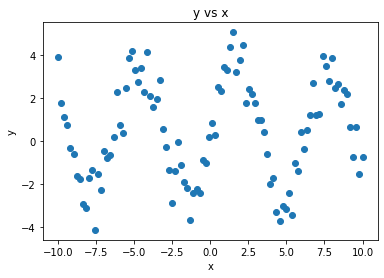

In [20]:
# Let us visualize the data
import matplotlib.pyplot as plt

xs = df['x'][:].values
ys = df['y'][:].values

# Plot y vs. x
plt.scatter(xs, ys) 

# Set the labels for x and y axes:
plt.xlabel('x') 
plt.ylabel('y')

# Set the title of the figure
plt.title("y vs x")

### 12.4.3 Fitting a Non-linear Function with SciPy

For non-linear regression, we will use `scipy.optimize.curve_fit` which internally performs Non-linear Least-squares Regression.

In [21]:
# Import optimize module
from scipy import optimize

def nonlinear_f(x, a, b):
    return  a * np.sin(x) + b

# Fit a linear model:
solution, _ = optimize.curve_fit(nonlinear_f, xs, ys, method='lm')

print("The estimated solution is: ", solution)

The estimated solution is:  [3.11746172 0.48206522]


### 12.4.4 Analyzing the Solution

Similar to our analysis in Section 12.3.4, let us analyze our solution qualitatively and quantitatively.

**1- Qualitative Analysis**. Let us first analyze the found solution qualitatively.

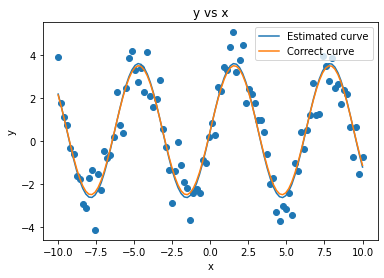

In [22]:
# Plot y vs. x
plt.scatter(xs, ys)

# Plot the estimated line
plot_func(nonlinear_f, solution, xs, "Estimated curve")

# Plot the correct curve
plot_func(nonlinear_f, (3, 0.5), xs, "Correct curve")

# Set the labels for x and y axes:
plt.xlabel('x') 
plt.ylabel('y')

# Set the title of the figure
plt.title("y vs x")

# Legend
plt.legend()

Visually, it appears that our estimated solution is a very good fit for the data and it overlaps nicely with the correct function with which we had generated the data.

**2- Quantitative Analysis**. Now, let us look at some the metrics we have defined in Section 12.3 to get a better feeling for how good our fit was:

In [23]:
estimated_y = nonlinear_f(xs, *solution) 
correct_y = ys

print("MSE Error: ", MSE(estimated_y, correct_y))
print("RMSE Error: ", RMSE(estimated_y, correct_y))
print("R-squared Error: ", R_squared(estimated_y, correct_y))

MSE Error:  0.6748838046926272
RMSE Error:  0.8215131190021419
R-squared Error:  0.854011457622468


We see again that we have obtained low error values, despite the noise. However, we couldn't obtain perfect regression ($R^2=1$) since our data was very noisy.

## Important Concepts

We would like our readers to have grasped the following crucial concepts and keywords from this chapter:

* Regression problem and its uses.
* Least-squares regression.
* Linear vs. non-linear regression.
* Linear and non-linear regression with SciPy.
* Qualitatively and quantitatively analyzing a regression solution.

## Further Reading

* The Elements of Statistical Learning, a free book that provides a good coverage of linear and non-linear regression: https://web.stanford.edu/~hastie/ElemStatLearn/

* Practical Regression and Anova using R, another free book that provides a practical coverage: https://cran.r-project.org/doc/contrib/Faraway-PRA.pdf

## Exercises

1. For clarity, we implemented the error metrics in Section 12.3 using `for` loops. Re-implement them using NumPy functions without using explicit `for` or `while` loops.

2. Generate 100 random $(x,y)$ values from a non-linear function, e.g. $y=x^2$, for $x\in[-10, 10]$ and use the linear regression steps in  Section 12.3 to regress a linear solution. Qualitatively and quantitatively analyze the obtained solution.

3. Choose your favorite city and download its temperature readings for two consecutive days from [meteoblue](https://content.meteoblue.com/en/content/view/full/2879). Download the readings as CSV files and load them using Pandas. Plot the data using Matplotlib and see the general shape of the function. Choose a suitable non-linear function and follow the steps in Section 12.4 to regress a function to the temperature data. Measure also how good the function represents the temperature readings of the second day.